# Combine data

In [160]:
import pandas as pd

df_trends = pd.read_csv('../data/final/google_trends_data_per_week_per_player.csv')
df_trends_missing = pd.read_csv('../data/google-trends/missing_data_values.csv')
df_igp = pd.read_csv('../data/final/performance_data_per_week_per_player.csv')
df_social = pd.read_csv('../data/final/social_media_data_per_week_per_player.csv')

In [161]:
df_igp
df_igp.columns = 'igp_' + df_igp.columns.values

In [162]:
df_trends
df_trends.columns = 'trends_' + df_trends.columns.values

df_trends_missing
df_trends_missing.columns = 'trends_' + df_trends_missing.columns.values
df_trends_missing.rename(columns={'trends_Player Name':'trends_Player', 'trends_Interest':'trends_Value'}, inplace=True)

df_trends = pd.concat([df_trends, df_trends_missing], ignore_index=True)

In [163]:
df_social
df_social.columns = 'smp_' + df_social.columns.values

In [164]:
merged_df = df_igp.merge(df_trends, left_on=['igp_Player Name', 'igp_Year', 'igp_Week'], right_on=['trends_Player', 'trends_Year', 'trends_Week'], how='left')

# Merge the result with df3 on 'Player', 'Year', and 'Week'
final_df = merged_df.merge(df_social, left_on=['igp_Player Name', 'igp_Year', 'igp_Week'], right_on=['smp_ownerFullName', 'smp_Year', 'smp_Week'], how='left')
final_df = final_df.drop(['trends_Year', 'trends_Week', 'smp_ownerFullName', 'smp_ownerFullName', 'trends_Player', 'igp_YearWeek', 'trends_date', 'smp_Week', 'smp_Year'], axis=1)
final_df.rename(columns={'igp_Player Name': 'Player Name', 'igp_Year': 'Year', 'igp_Week': 'Week'}, inplace=True)

In [165]:
import numpy as np
final_df['smp_Total Interactions'] = np.where(final_df['smp_Total Interactions'].isna(), final_df['smp_likesCount'] + final_df['smp_commentsCount'], final_df['smp_Total Interactions'])

In [167]:
final_df['trends_Value'].fillna(0, inplace=True)
final_df['igp_Min'].fillna(0, inplace=True)
final_df['smp_likesCount'] = final_df['smp_likesCount'].replace(-1, 0)

final_df = final_df.drop_duplicates(subset=['Player Name', 'Year', 'Week'])

/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_82137/1445971071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['trends_Value'].fillna(0, inplace=True)
/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_82137/1445971071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [168]:
final_df.to_csv('../data/final/def_data_missing_smp.csv', index=False)

In [26]:
def has_both_data(group):
    igp_columns = [col for col in group.columns if col.startswith('igp')]
    smp_columns = [col for col in group.columns if col.startswith('smp')]
    return group[igp_columns].notna().any().any() and group[smp_columns].notna().any().any()


# Group the DataFrame by 'ownerUsername' and filter the groups
df = final_df.groupby('Player Name').filter(has_both_data)


In [27]:
df

,Player Name,igp_Min,igp_Won,igp_Started,igp_Match Count,Year,Week,trends_Value,smp_ownerUsername,smp_Total Interactions,smp_likesCount,smp_commentsCount,smp_Followers at Posting,smp_postCount,smp_type_Image,smp_type_Sidecar,smp_type_Video,smp_topic_similarity_array,smp_average_scores,smp_difference
45,Paxten Aaronson,0.0,NaN,NaN,NaN,2023,32,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Paxten Aaronson,0.0,NaN,NaN,NaN,2023,33,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Paxten Aaronson,46.5,1.0,1.0,2.0,2023,35,35.0,paxten_aaronson8,10083.0,10020.0,63.0,NaN,1.0,0.0,1.0,0.0,[2.05536054e-05 7.87658921e-07 1.36779999e-06 ...,[3.73141887e-01 1.13022688e-02 1.05743905e-02 ...,[-3.73121333e-01 -1.13014812e-02 -1.05730227e-...
51,Paxten Aaronson,11.0,0.0,0.0,1.0,2023,37,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Paxten Aaronson,45.0,1.0,1.0,2.0,2023,38,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,Ramiz Zerrouki,0.0,NaN,NaN,NaN,2024,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24979,Ramiz Zerrouki,0.0,NaN,NaN,NaN,2023,27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,Ramiz Zerrouki,0.0,NaN,NaN,NaN,2023,28,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24983,Ramiz Zerrouki,0.0,NaN,NaN,NaN,2023,29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.to_csv('../data/final/def_data.csv', index=False)

In [103]:
import pandas as pd
df = pd.read_csv('../data/final/def_data.csv')


# Variable distibution

/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_82137/2564302655.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['smp_Total Interactions'].fillna(data['smp_likesCount'] + data['smp_commentsCount'], inplace=True)


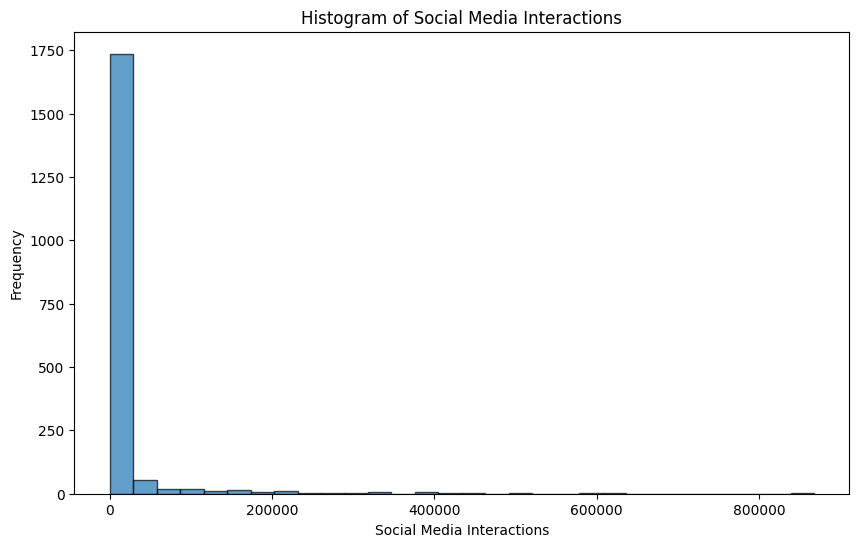

/opt/homebrew/Caskroom/miniforge/base/envs/thesis_bertopic_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 13.673941233257233] is not finite

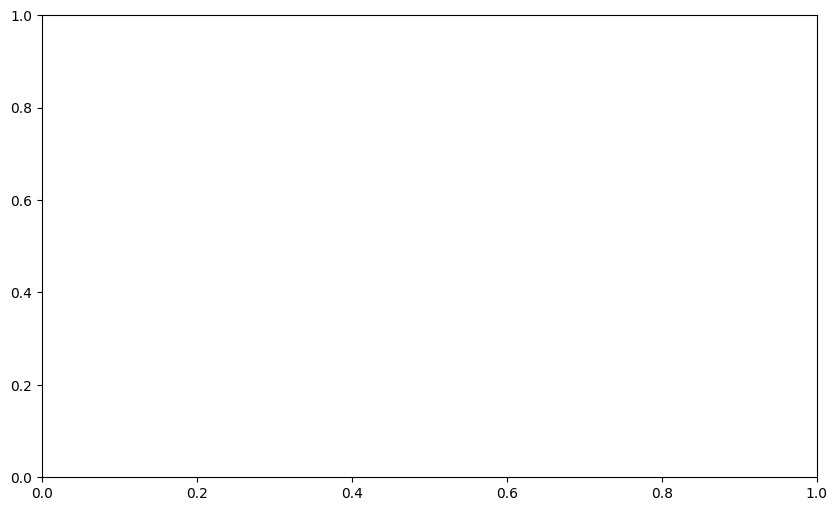

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

# Load the data
data = pd.read_csv('../data/final/def_data_missing_smp.csv', sep=';')

# Replace NA in smp_Total.Interactions with the sum of smp_likesCount and smp_commentsCount
data['smp_Total Interactions'].fillna(data['smp_likesCount'] + data['smp_commentsCount'], inplace=True)

# Drop rows with NA values in the required columns for hypothesis 1
data_h1 = data.dropna(subset=['smp_Total Interactions', 'smp_postCount'])

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(data_h1['smp_Total Interactions'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Social Media Interactions')
plt.xlabel('Social Media Interactions')
plt.ylabel('Frequency')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(np.log((data_h1['smp_Total Interactions']+1)), bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Log Social Media Interactions')
plt.xlabel('Log of Social Media Interactions')
plt.ylabel('Frequency')
plt.show()


# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(data_h1['smp_Total Interactions'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Social Media Interactions')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(data_h1['smp_Total Interactions'])
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)

if p > 0.05:
    print('The data is normally distributed')
else:
    print('The data is not normally distributed')

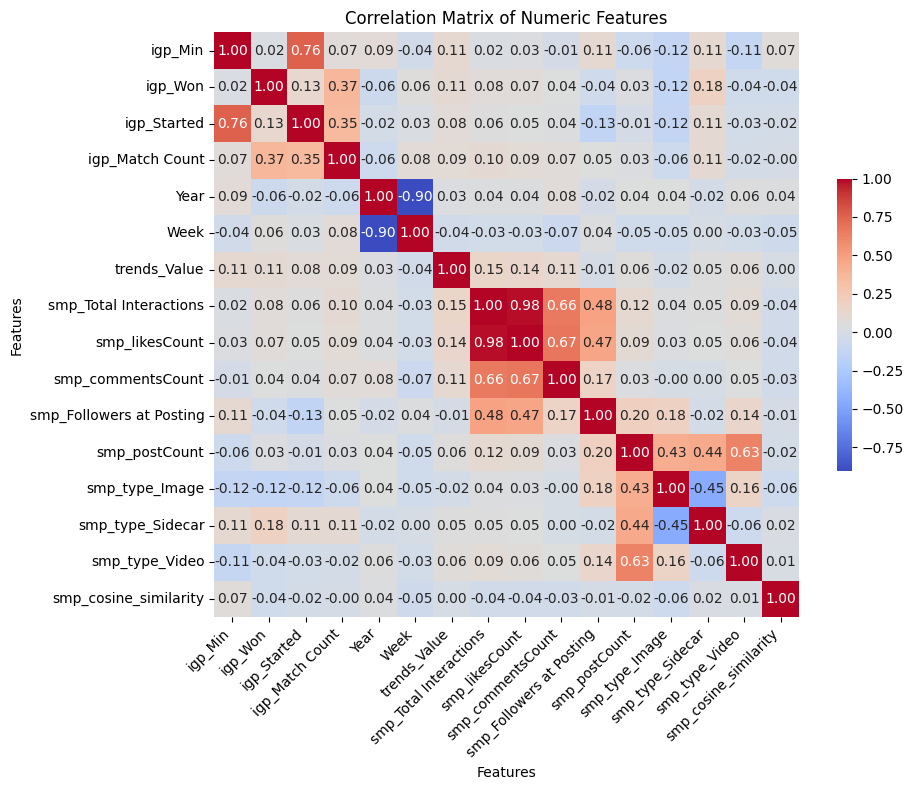

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

# Create a larger figure to accommodate the plot and annotations
plt.figure(figsize=(10, 8))

# Use seaborn's heatmap function to plot the correlation matrix
# annot=True to display the correlation values in the cells
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and a title for clarity
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix of Numeric Features')

# Tight layout often improves the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_82137/3977581189.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DateNumeric'] = filtered_data['Date'].map(pd.Timestamp.toordinal)
/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_82137/3977581189.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['InteractionsTrend'] = slope_interactions * filtered_data['DateNumeric'] + intercept_interactions


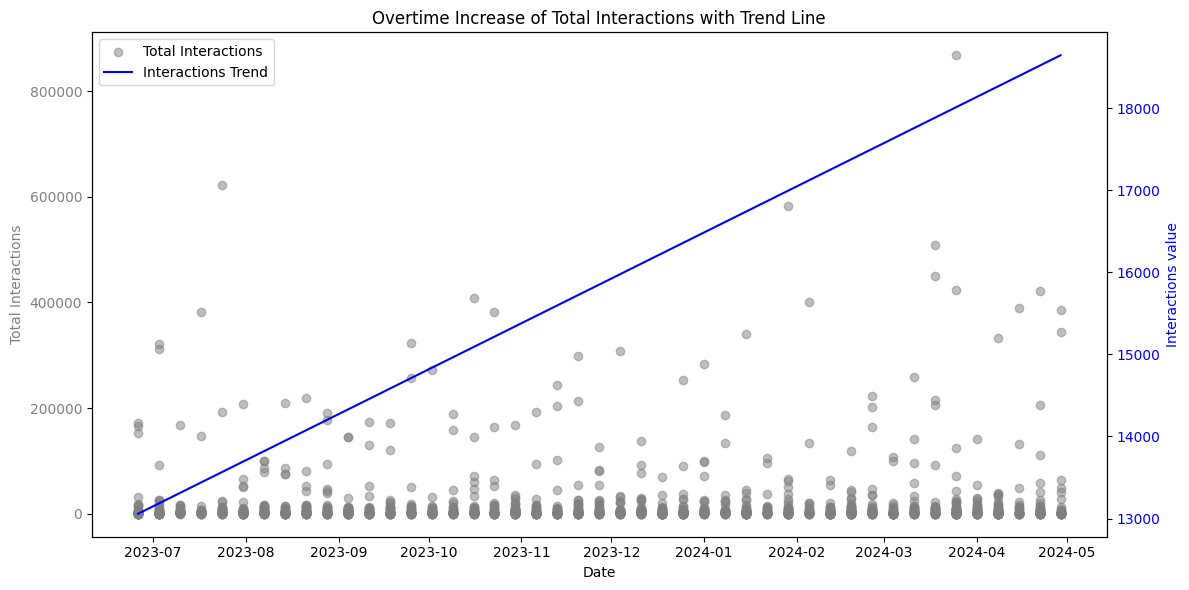

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter out rows where 'smp_Total Interactions' is NaN
filtered_data = data.dropna(subset=['smp_Total Interactions'])

# Convert 'Date' to a numeric value specifically for regression analysis
filtered_data['DateNumeric'] = filtered_data['Date'].map(pd.Timestamp.toordinal)

# Calculate regression line for 'smp_Total Interactions' in the filtered data
slope_interactions, intercept_interactions = np.polyfit(filtered_data['DateNumeric'], filtered_data['smp_Total Interactions'], 1)
filtered_data['InteractionsTrend'] = slope_interactions * filtered_data['DateNumeric'] + intercept_interactions

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot data points for 'smp_Total Interactions' on primary y-axis
ax1.scatter(filtered_data['Date'], filtered_data['smp_Total Interactions'], label='Total Interactions', color='grey', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Interactions', color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Create a secondary y-axis for the trend line
ax2 = ax1.twinx()
ax2.plot(filtered_data['Date'], filtered_data['InteractionsTrend'], label='Interactions Trend', linestyle='-', color='blue')
ax2.set_ylabel('Interactions value', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Adding title and improving layout
plt.title('Overtime Increase of Total Interactions with Trend Line')
fig.tight_layout()

# Adding a legend that combines elements from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

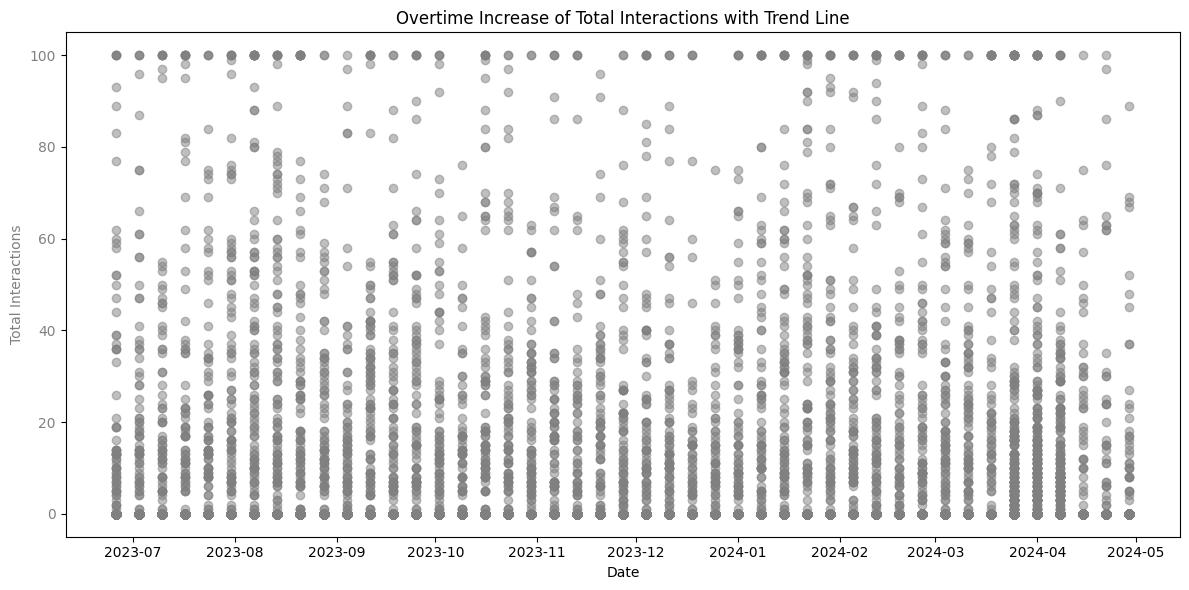

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter out rows where 'smp_Total Interactions' is NaN
filtered_data = data.dropna(subset=['trends_Value'])

# Convert 'Date' to a numeric value specifically for regression analysis
filtered_data['DateNumeric'] = filtered_data['Date'].map(pd.Timestamp.toordinal)

# Calculate regression line for 'smp_Total Interactions' in the filtered data
slope_interactions, intercept_interactions = np.polyfit(filtered_data['DateNumeric'], filtered_data['trends_Value'], 1)
filtered_data['InteractionsTrend'] = slope_interactions * filtered_data['DateNumeric'] + intercept_interactions

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot data points for 'smp_Total Interactions' on primary y-axis
ax1.scatter(filtered_data['Date'], filtered_data['trends_Value'], label='Total Interactions', color='grey', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Interactions', color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# # Create a secondary y-axis for the trend line
# ax2 = ax1.twinx()
# ax2.plot(filtered_data['Date'], filtered_data['InteractionsTrend'], label='Interactions Trend', linestyle='-', color='blue')
# ax2.set_ylabel('Interactions value', color='blue')
# ax2.tick_params(axis='y', labelcolor='blue')

# Adding title and improving layout
plt.title('Overtime Increase of Total Interactions with Trend Line')
fig.tight_layout()

# Adding a legend that combines elements from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [125]:
data['smp_Total Interactions']

15291    875.0
8766       NaN
1161       NaN
15021      NaN
20151      NaN
         ...  
5390       NaN
18935      NaN
665        NaN
22220      NaN
19610      NaN
Name: smp_Total Interactions, Length: 22725, dtype: float64

# Analysis

In [15]:
import numpy as np

data = df

data['smp_topic_similarity_array'] = data['smp_topic_similarity_array'].apply(lambda x: np.array(eval(x)))
data['smp_average_scores'] = data['smp_average_scores'].apply(lambda x: np.array(eval(x)))
data['smp_difference'] = data['smp_difference'].apply(lambda x: np.array(eval(x)))

# Calculate the average of the difference scores
data['average_difference'] = data['smp_difference'].apply(np.mean)


TypeError: eval() arg 1 must be a string, bytes or code object

In [16]:
import statsmodels.api as sm

# Prepare the data for regression
X = df['igp_Min']
y = df['smp_topic_similarity_array']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Summary of the regression model
regression_summary = model.summary()

regression_summary

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
df[['Player Name', 'igp_Min', 'smp_topic_similarity_array', 'smp_average_scores', 'smp_difference']]

,Player Name,igp_Min,smp_topic_similarity_array,smp_average_scores,smp_difference
0,Paxten Aaronson,46.5,[2.05536054e-05 7.87658921e-07 1.36779999e-06 ...,[3.73141887e-01 1.13022688e-02 1.05743905e-02 ...,[-3.73121333e-01 -1.13014812e-02 -1.05730227e-...
1,Paxten Aaronson,46.5,[2.05536054e-05 7.87658921e-07 1.36779999e-06 ...,[3.73141887e-01 1.13022688e-02 1.05743905e-02 ...,[-3.73121333e-01 -1.13014812e-02 -1.05730227e-...
2,Paxten Aaronson,0.0,[4.02678584e-02 1.36500369e-03 2.84112669e-03 ...,[4.07958374e-01 5.15513292e-02 6.39604146e-03 ...,[-3.67690515e-01 -5.01863255e-02 -3.55491476e-...
3,Paxten Aaronson,0.0,[4.02678584e-02 1.36500369e-03 2.84112669e-03 ...,[4.07958374e-01 5.15513292e-02 6.39604146e-03 ...,[-3.67690515e-01 -5.01863255e-02 -3.55491476e-...
4,Paxten Aaronson,35.0,[1.43406389e-01 8.70232726e-04 1.64656767e-03 ...,[3.71603826e-01 1.18124545e-02 8.29839513e-03 ...,[-2.28197437e-01 -1.09422217e-02 -6.65182746e-...
...,...,...,...,...,...
2663,Ramiz Zerrouki,90.0,[5.16835246e-01 1.23337451e-02 2.43549505e-02 ...,[3.64013669e-01 3.02425537e-02 2.29464113e-02 ...,[ 1.52821577e-01 -1.79088086e-02 1.40853922e-...
2664,Ramiz Zerrouki,20.0,[0.06753134 0.00302771 0.00423895 0.00436808 0...,[3.61931291e-01 2.49101160e-02 1.19207678e-02 ...,[-2.94399950e-01 -2.18824027e-02 -7.68181599e-...
2665,Ramiz Zerrouki,20.0,[0.06753134 0.00302771 0.00423895 0.00436808 0...,[3.61931291e-01 2.49101160e-02 1.19207678e-02 ...,[-2.94399950e-01 -2.18824027e-02 -7.68181599e-...
2666,Ramiz Zerrouki,66.0,[0.08157332 0.00433094 0.00491208 0.00559157 0...,[3.79982181e-01 4.19201039e-02 1.69476581e-02 ...,[-2.98408857e-01 -3.75891610e-02 -1.20355827e-...
